## 1. Data Loading, Structure, and System Setup

**Project Goals**

Explore Using different sequence models (LSTM, Attention, Transformers) for NLP sentence classification Problem to classify tweets into disaster relevant or not

Preprocess/Clean tweets data into appropriate format for inputting into neural network models

Understand word embeddings, and how we can use them to represent words as inputs into NLP models

Engineer new features from tweets data to help us improve model classification

### Connecting Google Colab to Google Drive

**Loading Your Data into Google Colaboratory**

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
 # Import Libraries
 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter('ignore') 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords 


from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import string
import re


sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [26]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# Loading the Datasets

df_train = pd.read_csv('/content/drive/MyDrive/Final Year  Research Project/train.csv')
df_test= pd.read_csv('/content/drive/MyDrive/Final Year  Research Project/test.csv')


In [29]:
print('There are {} rows and {} columns in the Train Dataset'.format(df_train.shape[0],df_train.shape[1]))
print('There are {} rows and {} columns in the Train Dataset'.format(df_test.shape[0], df_test.shape[1]))

There are 7613 rows and 5 columns in the Train Dataset
There are 3263 rows and 4 columns in the Train Dataset


##Data Understanding

In [30]:
#Load the first 3 columns
df_train.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [ ]:
}# Summary of the Data Frame (index dtype and column dtypes)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
#Distinct Keywords in the train dataset

dist_keyword=df_train['keyword'].value_counts()
dist_keyword

fatalities               45
armageddon               42
deluge                   42
damage                   41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

## 2.0 Exploratory Data Analysis of Tweets

**Checking the Number of Missing Values**

In [ ]:
df_train.isna().sum().to_frame().rename(columns={0:'NA Counts'}).style.background_gradient(cmap="summer")

,NA Counts
id,0
keyword,61
location,2533
text,0
target,0


,Total,Percent
location,2533,0.332720
keyword,61,0.008013


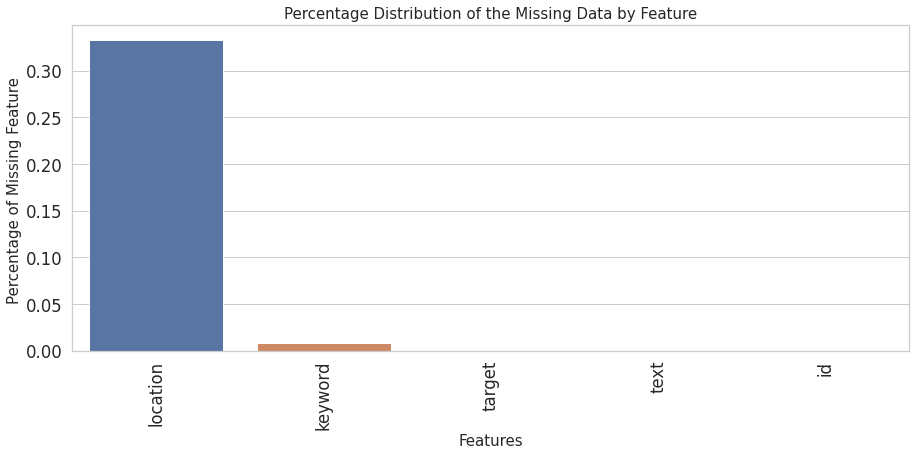

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of Missing Feature ', fontsize=15)
plt.title('Percentage Distribution of the Missing Data by Feature', fontsize=15)
missing_data.head(2)

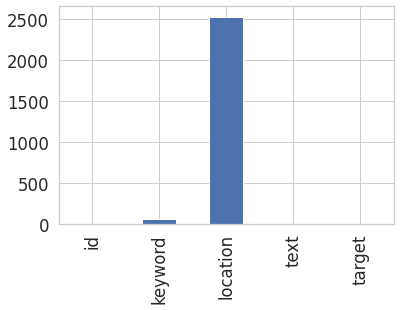

In [31]:
df_train.isnull().sum().plot(kind='bar')

Location has lots of NaN values and would not be a good/useful feature, unless we have a priori knowledge of where a disaster occured. 

Furthermore, some of them are not in the correct format, so it will be quite time consuming to clean it.

Keyword has NaNs as well, but can be imputed with 'None'.

**Distribution of Missing Values in both the Training, and Testing Sets**

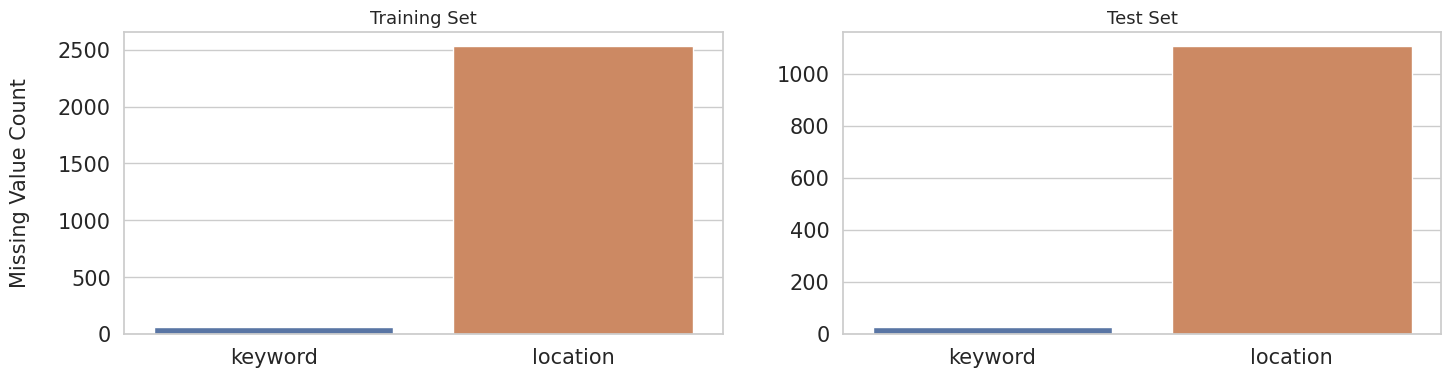

In [ ]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=df_train[missing_cols].isnull().sum().index, y=df_train[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=df_test[missing_cols].isnull().sum().index, y=df_test[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

for df in [df_train, df_test]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

**Distribution of the Target**

Text(0, 0.5, 'Samples')

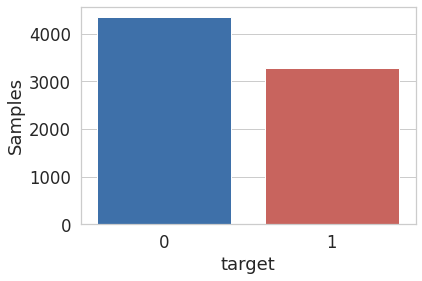

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

color = [sns.xkcd_rgb['medium blue'], sns.xkcd_rgb['pale red']]
sns.countplot('target',data = df_train, palette = color)
plt.gca().set_ylabel('Samples')

**Number of characters in Tweets**

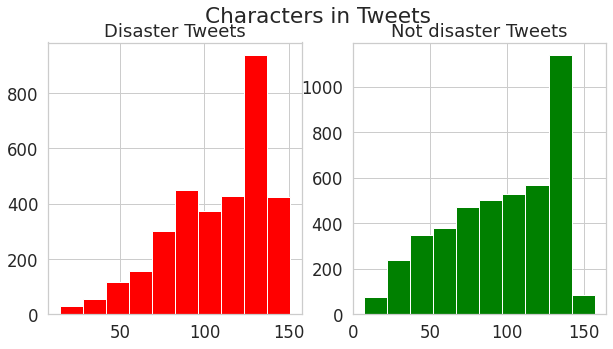

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df_train[df_train['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Disaster Tweets')
tweet_len=df_train[df_train['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster Tweets')
fig.suptitle('Characters in Tweets')
plt.show()

**Number of Words in a Tweet**

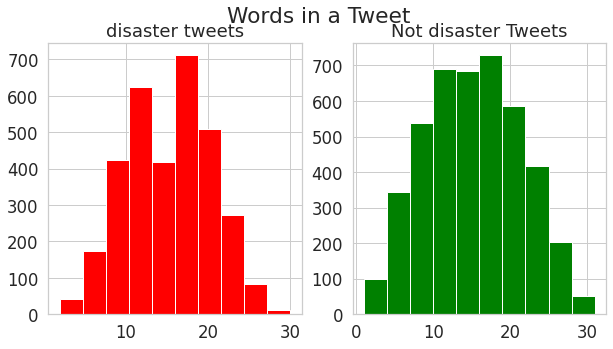

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster Tweets')
fig.suptitle('Words in a Tweet')
plt.show()

**Most Used KeyWords**

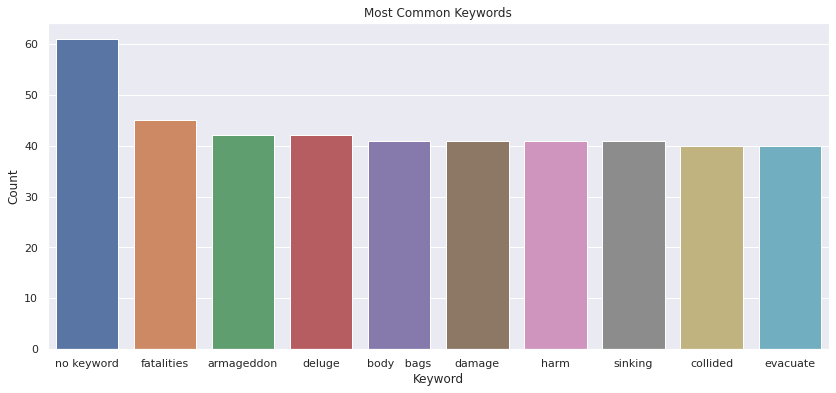

In [ ]:
from collections import Counter
df_train.keyword = df_train['keyword'].str.replace("[^a-zA-Z#]", " ")
keyword = df_train.keyword[df_train.keyword.notnull()].tolist()
keyword = Counter(keyword)
keywords = pd.DataFrame(keyword.most_common(10), columns=['Keyword', 'Count'])
sns.set(rc={'figure.figsize':(14,6)})
sns.barplot(data = keywords, x = 'Keyword', y = 'Count')
plt.title("Most Common Keywords")
plt.show()

**Number of Tweets of each type i.e. Real and Fake**


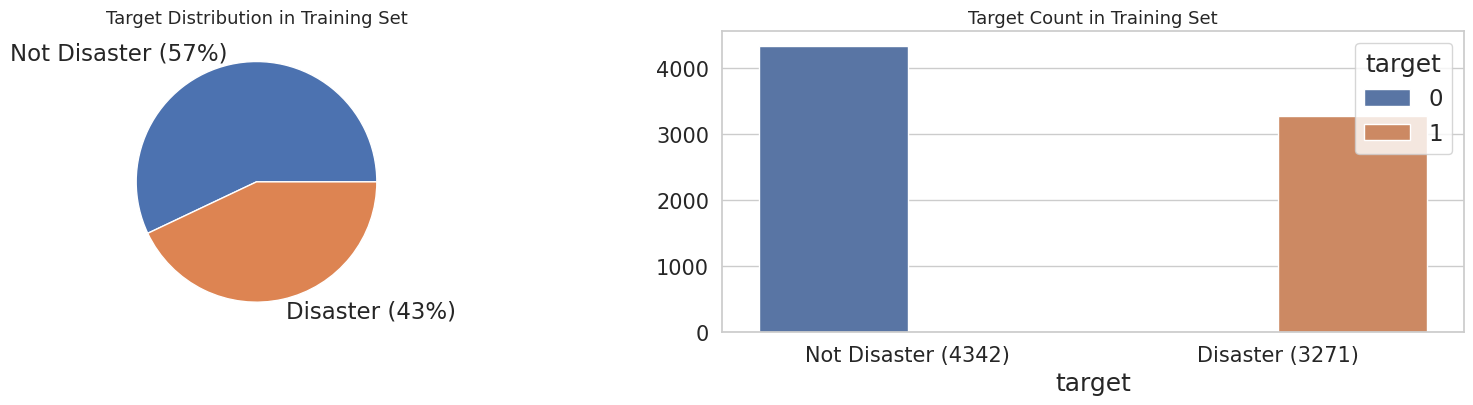

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

df_train.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'])
sns.countplot(x=df_train['target'], hue=df_train['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()

**Target  Distribution of KeyWords**

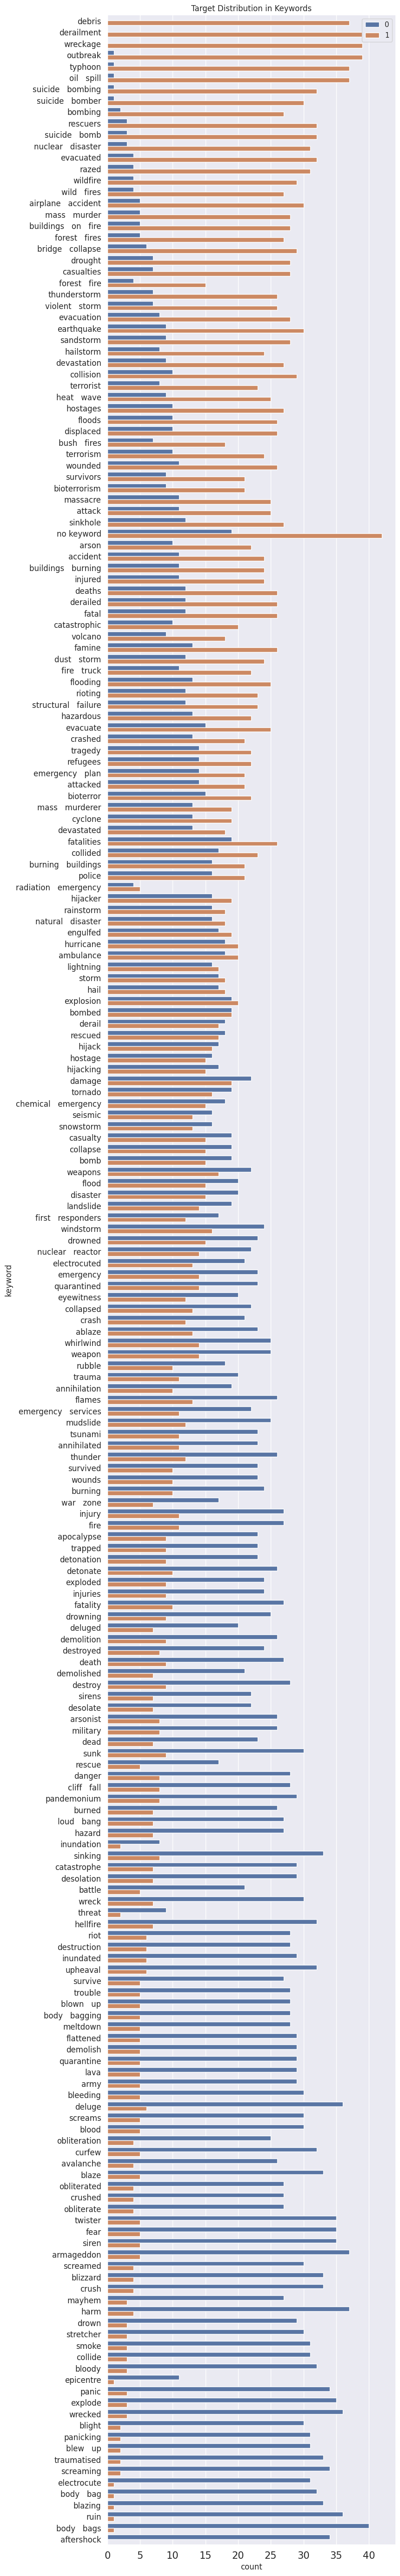

In [ ]:
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
 import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [11]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter('ignore')

**Distribution of Character, Word and Sentence Frequency**

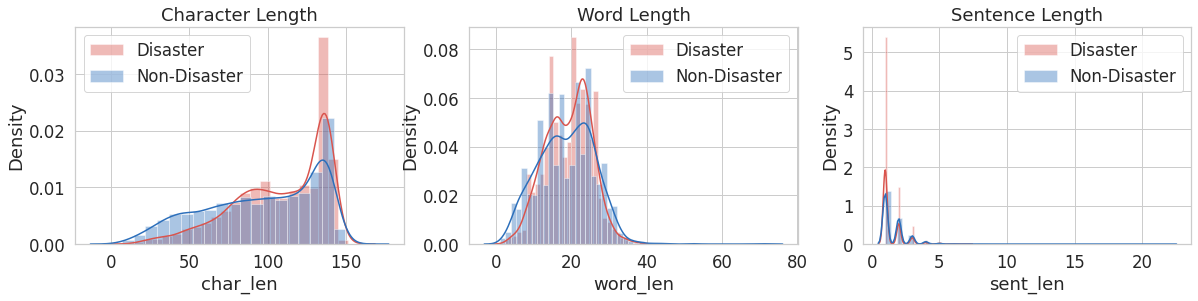

In [33]:
#import nltk
#nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# count number of characters in each tweet
df_train['char_len'] = df_train.text.str.len()

# count number of words in each tweet
word_tokens = [len(word_tokenize(tweet)) for tweet in df_train.text]
df_train['word_len'] = word_tokens

# count number of sentence in each tweet
sent_tokens = [len(sent_tokenize(tweet)) for tweet in df_train.text]
df_train['sent_len'] = sent_tokens

plot_cols = ['char_len','word_len','sent_len']
plot_titles = ['Character Length','Word Length','Sentence Length']

plt.figure(figsize=(20,4))
for counter, i in enumerate([0,1,2]):
    plt.subplot(1,3,counter+1)
    sns.distplot(df_train[df_train.target == 1][plot_cols[i]], label='Disaster', color=color[1]).set_title(plot_titles[i])
    sns.distplot(df_train[df_train.target == 0][plot_cols[i]], label='Non-Disaster', color=color[0])
    plt.legend()

In [34]:
# Investigating the Outliers in Tweets

df_train[df_train.sent_len > 8]
df_train[df_train.word_len > 50]

,id,keyword,location,text,target,char_len,word_len,sent_len
362,520,army,Pakistan,.: .: .: .: .: .: .: .: .: .: .: .: .: .: .: ....,0,140,53,22
830,1207,blizzard,NaN,the best thing at DQ is the cotton candy blizz...,0,100,60,2
1270,1832,burned,NaN,when you're taking a shower and someone flushe...,0,157,72,2
4929,7023,mayhem,?? Made in the Philippines ??,_\n?????RETWEET\n???????\n?????FOLLOW ALL WHO ...,0,145,70,11
4949,7053,meltdown,? miranda ? 521 mi,@kinkyconnors IM sorry for my meltdown last ni...,0,127,52,2


Some of the outliers such as sentence length > 10 consist of a lot of punctuations. 

I left it unchanged as I feel that a tweet with a many sentences, which is indicative of many punctuations, suggest that it is not a serious tweet (about a disaster).

 Of course there might be some instances where a disaster tweet consists of multiple punctuations (e.g. a volvano just erupted!!!!!!!!!!!!) but that is not very frequent.

**Top Most Common Punctuations**

Text(0.5, 1.0, 'Top Punctuations for Disaster Tweets')

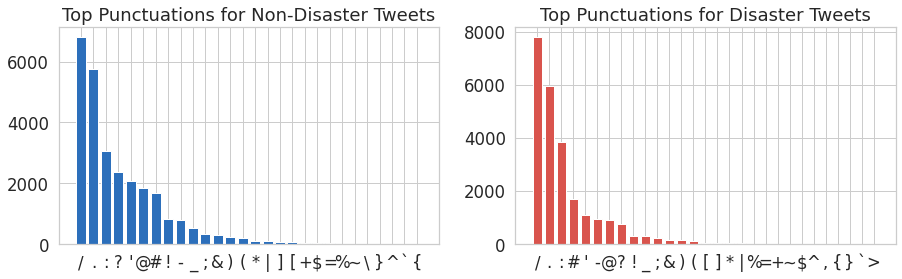

In [35]:
## Plot most common punctuations

from string import punctuation

# Get all the punctuations in dataframe for Disaster and Non-Disaster
corpus0 = [] # Non-Disaster
[corpus0.append(c) for tweet in df_train[df_train.target == 0].text for c in tweet]
corpus0 = list(filter(lambda x: x in punctuation, corpus0)) # use filter to select only punctuations
corpus1 = [] # Disaster
[corpus1.append(c) for tweet in df_train[df_train.target == 1].text for c in tweet]
corpus1 = list(filter(lambda x: x in punctuation, corpus1)) 

from collections import Counter
x0,y0 = zip(*Counter(corpus0).most_common())
x1,y1 = zip(*Counter(corpus1).most_common())

# Plot bar plot of top punctuations for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Punctuations for Non-Disaster Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Punctuations for Disaster Tweets')

Most common punctuation is the slash, which usually comes from a link ('http://t.co/'). 

URLs should be removed, as well as most punctuations, with the exception of '!?', which signal some kind of intensity or tonality of the tweet.

**Top Most Common Stopwords**

Text(0.5, 1.0, 'Top Stopwords for  Disaster Tweets')

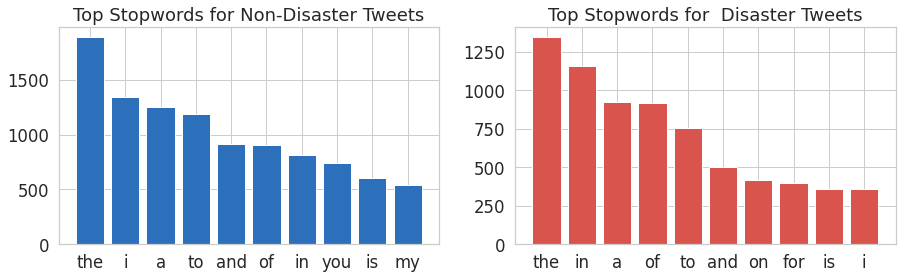

In [36]:
## Plot most common stopwords

#nltk.download('stopwords')

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# Get all the word tokens in dataframe for Disaster and Non-Disaster
corpus0 = [] # Non-Disaster
[corpus0.append(word.lower()) for tweet in df_train[df_train.target == 0].text for word in word_tokenize(tweet)]
corpus1 = [] # Disaster
[corpus1.append(word.lower()) for tweet in df_train[df_train.target == 1].text for word in word_tokenize(tweet)]

# Function for counting top stopwords in a corpus
def count_top_stopwords(corpus):
    stopwords_freq = {}
    for word in corpus:
        if word in stop: 
            if word in stopwords_freq:
                stopwords_freq[word] += 1
            else:
                stopwords_freq[word] = 1
    topwords = sorted(stopwords_freq.items(), key=lambda item: item[1], reverse=True)[:10] # get the top 10 stopwords
    x,y = zip(*topwords) # get key and values
    return x,y

x0,y0 = count_top_stopwords(corpus0)
x1,y1 = count_top_stopwords(corpus1)

# Plot bar plot of top stopwords for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Stopwords for Non-Disaster Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Stopwords for  Disaster Tweets')

There are lots of occurences of stopwords. These should be removed as they do not predict the target.

**Top Most Common Words**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

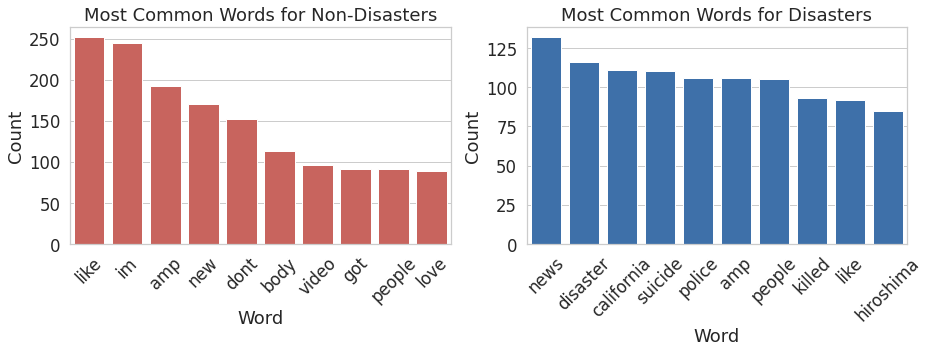

In [37]:
## Plot most common words
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop = ENGLISH_STOP_WORDS.union(stop) # combine stop words from different sources

# function for removing url from text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Get all the word tokens in dataframe for Disaster and Non-Disaster
# - remove url, tokenize tweet into words, lowercase words
corpus0 = [] # Non-Disaster
[corpus0.append(word.lower()) for tweet in df_train[df_train.target == 0].text for word in word_tokenize(remove_url(tweet))]
corpus0 = list(filter(lambda x: x not in stop, corpus0)) # use filter to unselect stopwords

corpus1 = [] # Disaster
[corpus1.append(word.lower()) for tweet in df_train[df_train.target == 1].text for word in word_tokenize(remove_url(tweet))]
corpus1 = list(filter(lambda x: x not in stop, corpus1)) # use filter to unselect stopwords

# Create df for word counts to use sns plots
a = Counter(corpus0).most_common()
df0 = pd.DataFrame(a, columns=['Word','Count'])

a = Counter(corpus1).most_common()
df1 = pd.DataFrame(a, columns=['Word','Count'])

# Plot for Disaster and Non-Disaster
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='Word',y='Count',data=df0.head(10), color=color[1]).set_title('Most Common Words for Non-Disasters')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x='Word',y='Count',data=df1.head(10), color=color[0]).set_title('Most Common Words for Disasters')
plt.xticks(rotation=45)

Disaster tweets contain more words related to disasters. 

But still need more cleaning. And what is the word amp? Will need to expand contractions as well such as 'im'.

**Wordcloud for Hashtags**

Text(0.5, 1.0, 'Disaster')

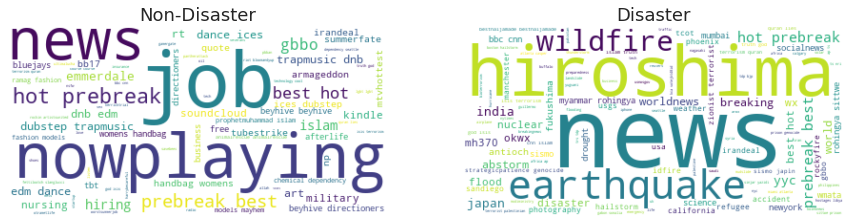

In [38]:
def clean(word):
    for p in punctuation: word = word.replace(p, '')
    return word

from wordcloud import WordCloud

def wc_hash(target):
    hashtag = [clean(w[1:].lower()) for tweet in df_train[df_train.target == target].text for w in tweet.split() if '#' in w and w[0] == '#']
    hashtag = ' '.join(hashtag)
    my_cloud = WordCloud(background_color='white', stopwords=stop).generate(hashtag)

    plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")

plt.figure(figsize=(15,4))
wc_hash(0)
plt.title('Non-Disaster')
wc_hash(1)
plt.title('Disaster')

## 3. Meta-Feature Engineering

Here, we extract some features from the tweets that might give us some idea about whether it is a disaster or not. 

The purpose of this is to build a feature-based model and use it as part of an ensemble model to improve the predictions of the sequence model. Although it might not perform well on its own, it can actually boost the performance when combined with other models.

polarity - range of [-1,1] where 1 denotes positivity and -1 denotes negativity

subjectivity - range of [0,1] where 1 denotes personal opinions and 0 denotes factual info

exclaimation_num - number of exclamation marks in tweet

questionmark_num - number of question marks in tweet

url_num - number of urls in tweet

hash_num - number of hashtags (#) in tweet

mention_num - number of mentions (@) in tweet

contraction_num - number of contractions (e.g I'm, we're, we've)

In [39]:
from textblob import TextBlob

# polarity and subjectivity
df_train['polarity'] = [TextBlob(tweet).sentiment.polarity for tweet in df_train.text]
df_train['subjectivity'] = [TextBlob(tweet).sentiment.subjectivity for tweet in df_train.text]

#############################################################################################################################
# exclaimation and question marks
df_train['exclaimation_num'] = [tweet.count('!') for tweet in df_train.text]
df_train['questionmark_num'] = [tweet.count('?') for tweet in df_train.text]

#############################################################################################################################
# count number of hashtags and mentions
# Function for counting number of hashtags and mentions
def count_url_hashtag_mention(text):
    urls_num = len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))
    word_tokens = text.split()
    hash_num = len([word for word in word_tokens if word[0] == '#' and word.count('#') == 1]) # only appears once in front of word 
    mention_num = len([word for word in word_tokens if word[0] == '@' and word.count('@') == 1]) # only appears once in front of word 
    return urls_num, hash_num, mention_num

url_num, hash_num, mention_num = zip(*[count_url_hashtag_mention(tweet) for tweet in df_train.text])
df_train = df_train.assign(url_num = url_num, hash_num = hash_num, mention_num = mention_num)

#############################################################################################################################
# count number of contractions
contractions = ["'t", "'re", "'s", "'d", "'ll", "'ve", "'m"]
df_train['contraction_num'] = [sum([tweet.count(cont) for cont in contractions]) for tweet in df_train.text]

In [40]:
df_train.head(3)

,id,keyword,location,text,target,char_len,word_len,sent_len,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14,1,0.00000,0.0000,0,0,0,1,0,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,8,2,0.10000,0.4000,0,0,0,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,24,2,-0.01875,0.3875,0,0,0,0,0,1


##4. Text Data Cleaning

This is the most important step of the entire project — text preprocessing/cleaning. This cleans the text into a more 'suitable' form as inputs into the NLP models. For example, URLs might make the text difficult to understand and should be removed when necessary.

 The choice of whether to remove/clean some words or parts-of-speech is an entire process on its own and sometimes this needs to be experimented. Different models are also able to deal with different kinds of parts-of-speech.
 

Replace NaNs with 'None'

Expand Contractions

Remove Emojis

Remove URLs

Remove Punctuations except '!?' as they convey intensity and tonality of tweet

Replace 'amp' with 'and'

Word Segmentaion - segment words such as 'iwould' into 'i' and 'would'

Lemmatization - reduces inflected words into their root form; verb 

part-of-speech tag is used here)

Ngrams Exploration

Remove Stopwords

WordCloud of most commmon words (Unigrams)


In [41]:
## Replace NaNs with 'None'
df_train.keyword.fillna('None', inplace=True) 

#############################################################################################################################
## Expand Contractions

# Function for expanding most common contractions https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

df_train.text = [decontraction(tweet) for tweet in df_train.text]

#############################################################################################################################
## Remove Emojis

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

print(remove_emoji("OMG there is a volcano eruption!!! 😭😱😷"))

df_train.text = df_train.text.apply(lambda x: remove_emoji(x))

OMG there is a volcano eruption!!! 


In [42]:
#############################################################################################################################
## Remove URLs
df_train.text = df_train.text.apply(lambda x: remove_url(x))

#############################################################################################################################
## Remove Punctuations except '!?'

def remove_punct(text):
    new_punct = re.sub('\ |\!|\?', '', punctuation)
    table=str.maketrans('','',new_punct)
    return text.translate(table)

df_train.text = df_train.text.apply(lambda x: remove_punct(x))

#############################################################################################################################
## Replace amp
def replace_amp(text):
    text = re.sub(r" amp ", " and ", text)
    return text

df_train.text = df_train.text.apply(lambda x: replace_amp(x))

#############################################################################################################################

In [43]:
 import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
## Lemmatization

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemma(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(w.lower(), pos='v') for w in words])

df_train.text = df_train.text.apply(lambda x: lemma(x))

##Ngrams Analysis

In [49]:
## Ngrams
from nltk.util import ngrams

def generate_ngrams(text, n):
    words = word_tokenize(text)
    return [' '.join(ngram) for ngram in list(get_data(ngrams(words, n))) if not all(w in stop for w in ngram)] # exclude if all are stopwords


# in newer versions of python, raising StopIteration exception to end a generator, which is used in ngram, is deprecated
def get_data(gen):
    try:
        for elem in gen:
            yield elem
    except (RuntimeError, StopIteration):
        return


In [50]:
# Bigrams

bigrams_disaster = df_train[df_train.target==1].text.apply(lambda x: generate_ngrams(x, 2))
bigrams_ndisaster = df_train[df_train.target==0].text.apply(lambda x: generate_ngrams(x, 2))

bigrams_d_dict = {}
for bgs in bigrams_disaster:
    for bg in bgs:
        if bg in bigrams_d_dict:
            bigrams_d_dict[bg] += 1
        else:
            bigrams_d_dict[bg] = 1

bigrams_d_df = pd.DataFrame(bigrams_d_dict.items(), columns=['Bigrams','Count'])

bigrams_nd_dict = {}
for bgs in bigrams_ndisaster:
    for bg in bgs:
        if bg in bigrams_nd_dict:
            bigrams_nd_dict[bg] += 1
        else:
            bigrams_nd_dict[bg] = 1            

bigrams_nd_df = pd.DataFrame(bigrams_nd_dict.items(), columns=['Bigrams','Count'])

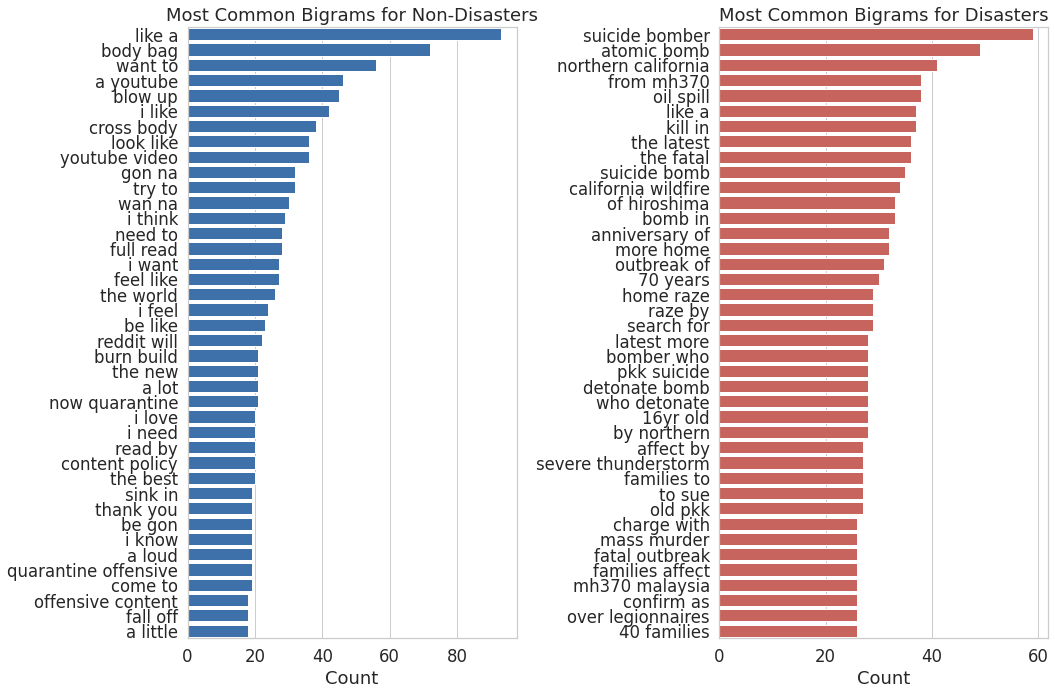

In [51]:
# Barplots for bigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Bigrams',data=bigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Bigrams for Non-Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Bigrams',data=bigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Bigrams for Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()

### Word Clouds

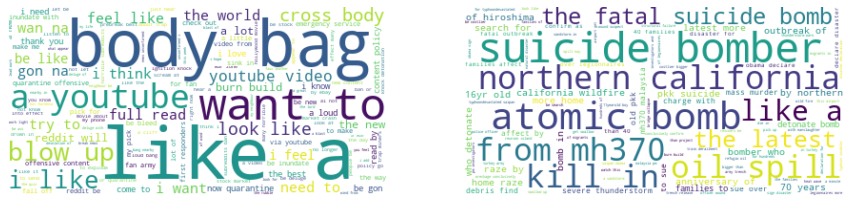

In [52]:
# Woudcloud for bigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
my_cloud = WordCloud(background_color='white', stopwords=stop).generate_from_frequencies(bigrams_nd_dict)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1,2,2)
my_cloud = WordCloud(background_color='white', stopwords=stop).generate_from_frequencies(bigrams_d_dict)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [53]:
# Trigrams

trigrams_disaster = df_train[df_train.target==1].text.apply(lambda x: generate_ngrams(x, 3))
trigrams_ndisaster = df_train[df_train.target==0].text.apply(lambda x: generate_ngrams(x, 3))

trigrams_d_dict = {}
for tgs in trigrams_disaster:
    for tg in tgs:
        if tg in trigrams_d_dict:
            trigrams_d_dict[tg] += 1
        else:
            trigrams_d_dict[tg] = 1

trigrams_d_df = pd.DataFrame(trigrams_d_dict.items(), columns=['Trigrams','Count'])

trigrams_nd_dict = {}
for tgs in trigrams_ndisaster:
    for tg in tgs:
        if tg in trigrams_nd_dict:
            trigrams_nd_dict[tg] += 1
        else:
            trigrams_nd_dict[tg] = 1            

trigrams_nd_df = pd.DataFrame(trigrams_nd_dict.items(), columns=['Trigrams','Count'])

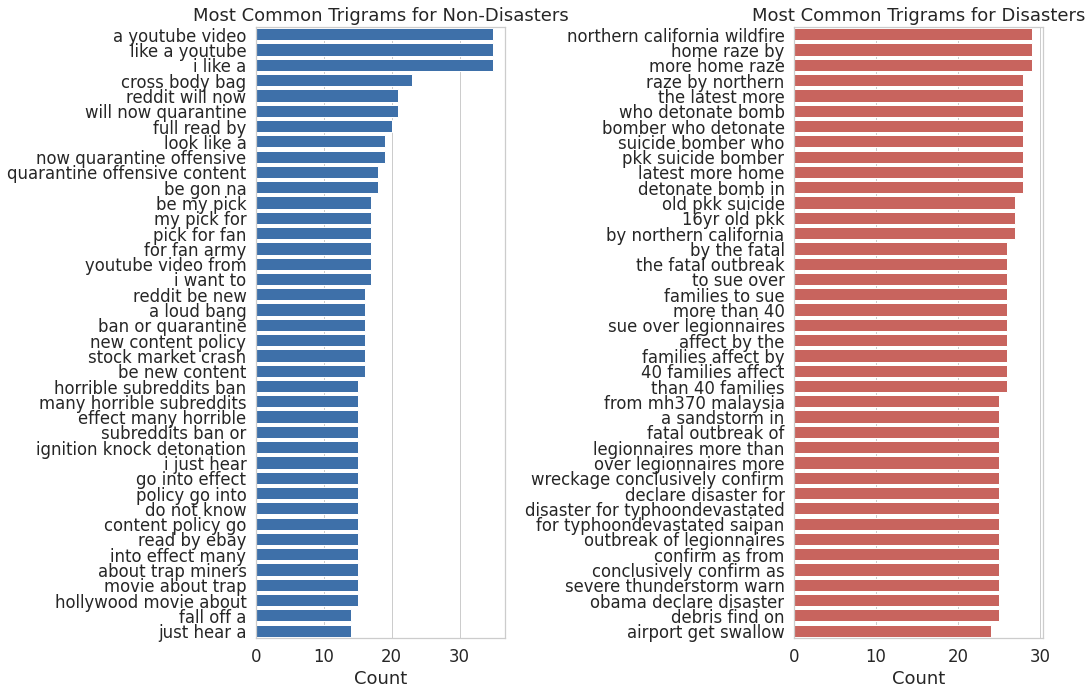

In [54]:
# Barplots for trigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Trigrams',data=trigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Trigrams for Non-Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Trigrams',data=trigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Trigrams for Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()


In [55]:
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    return ' '.join([w.lower() for w in word_tokens if not w.lower() in stop])

#df_train_tmp = tweets.copy()
df_train['text_nostopwords'] = df_train.text.apply(lambda x: remove_stopwords(x))

**WordCloud of Most Common Words after Cleaning**

Removed some words such as 'new', 'like' and 'people' as they are common between both targets

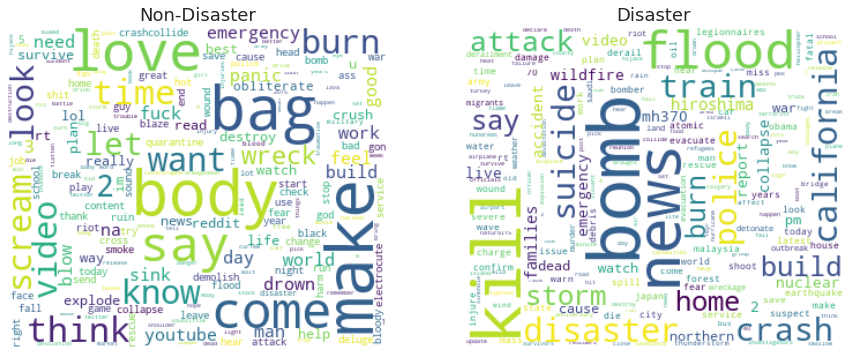

In [56]:
## Plot word cloud for most common words after cleaning

from PIL import Image
mask = np.array(Image.open('/content/drive/MyDrive/Final Year  Research Project/twitter logo.png'))
reverse = mask[...,::-1,:]

def wc_words(target, mask=mask):
    words = [word.lower() for tweet in df_train[df_train.target == target].text_nostopwords for word in tweet.split()]
    words = list(filter(lambda w: w != 'like', words))
    words = list(filter(lambda w: w != 'new', words))
    words = list(filter(lambda w: w != 'people', words))
    dict = {}
    for w in words:
        if w in dict:
            dict[w] += 1
        else:
            dict[w] = 1
    # plot using frequencies        
    my_cloud = WordCloud(background_color='white', stopwords=stop, mask=mask, random_state=0).generate_from_frequencies(dict) 
    
    plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")

plt.figure(figsize=(15,10))
wc_words(0)
plt.title('Non-Disaster')
wc_words(1, reverse)
plt.title('Disaster')
plt.show()


In [57]:
pd.options.display.max_colwidth = 200
for t in df_train['text'].sample(n=20, random_state=0):
    print(t)
pd.reset_option('max_colwidth')

katiekatcubs you already know how this shit go world series or armageddon
lemairelee danharmon people near meltdown comics who have free time to wait in line on sunday nights be not a representative sample 140
16 tix calgary flame vs col avalanche preseason 929 scotiabank saddledome
if you ever think you run out of choices in life rembr there be that kid that have no choice but wear a suicide bomb vest
if you dotish to blight your car go right ahead once it be not mine
electrocute yourself
thief break front window of hicksville store steal 50 cell phone flee crash into
doone silver architects have win permission to demolish birmingham be natwest tower and replace it with what will be citys tallest build
fire destroy two build on 2nd street in manchester
minsuwoongs i completely understand because i just wake up like 15 minutes ago and im burn
top link reddit be new content policy go into effect many horrible subreddits ban or quarantine
come later this year the man that tattoo women a 

In [58]:
pd.reset_option('max_colwidth')
df_train.drop('text_nostopwords', axis=1, inplace=True)
df_train.head(3)

,id,keyword,location,text,target,char_len,word_len,sent_len,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
0,1,None,NaN,our deeds be the reason of this earthquake may...,1,69,14,1,0.00000,0.0000,0,0,0,1,0,0
1,4,None,NaN,forest fire near la ronge sask canada,1,38,8,2,0.10000,0.4000,0,0,0,0,0,0
2,5,None,NaN,all residents ask to ishelter in place be be n...,1,133,24,2,-0.01875,0.3875,0,0,0,0,0,1


## 5 Train Validation Data Split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(['id','keyword','location','target'],axis=1), df_train[['target']], test_size=0.2, stratify=df_train[['target']], random_state=0)
X_train_text = X_train['text']
X_val_text = X_val['text']

print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)

X_train shape:  (6090, 12)
X_val shape:  (1523, 12)
y_train shape:  (6090, 1)
y_val shape:  (1523, 1)


In [60]:
print('Train Class Proportion:\n', y_train['target'].value_counts() / len(y_train) * 100)
print('\nValidation Class Proportion:\n', y_val['target'].value_counts() / len(y_val) * 100)

Train Class Proportion:
 0    57.027915
1    42.972085
Name: target, dtype: float64

Validation Class Proportion:
 0    57.058437
1    42.941563
Name: target, dtype: float64


## 6. Embedding Layer

**Word Representation**

Word representation refers to representing words as numbers so that a computer can understand it. One way to represent words is to use a one-hot representation (bottom left), where each word in a corpus/dictionary is a vector of all 0s except the index which it is assigned to.

**Word Embeddings**

A better way to represent words is using word embeddings, which can be learned from large corpuses of texts, such as Wikipedia. 

It is a dense way, compared to the sparse way for word representation, of representing words as well as the relationships between them. A word embedding is a learned representation for text where words that have the same meaning have a similar representation. 

**6.1 Tokenization**

To feed the tweets into the model, first we need to split them up. Here we tokenize the sentences -- break them up into words and assign them an integer based on the vocabulary dictionary. 

The maximum vocabulary size is set to 5000, so only the most common num_words-1 words will be kept. oov_token is set to <UNK> so that out-of-vocabulary words will be given an index instead of being ignored during text_to_sequence call.

Use fit_on_texts to create a word-to-index vocabulary dictionary based on the train texts. This creates the vocabulary index based on word frequency, with words that appear more often at the top of the vocabulary.

texts_to_sequences transforms each text in texts to a sequence of integers

In [61]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer_1 = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer_1.fit_on_texts(X_train_text)

In [62]:
X_train_text = tokenizer_1.texts_to_sequences(X_train_text)
X_val_text = tokenizer_1.texts_to_sequences(X_val_text)
print(X_train_text[:10])
print('')
print(X_val_text[:10])

[[61, 2, 4, 26, 5, 3, 4986, 85, 1066, 356, 22, 937, 19, 14, 19, 15, 1850], [4987, 2164, 3347, 38, 109, 121, 2, 1247, 315, 297], [4988, 4989, 1067, 81, 101], [8, 124, 9, 2, 4990, 53, 1248, 882, 5, 26, 4991, 435, 37, 1638, 4992, 27, 11, 4, 4993, 1851, 231, 10, 79, 1068, 182], [4994, 66, 3348, 3349, 4995, 463, 22, 29, 5, 718, 4996, 1069, 8, 271, 157, 87, 97, 8, 137, 2165, 178, 2, 681, 172], [4997, 263, 7, 3, 3350], [13, 3, 150, 7, 4998, 1249, 4999, 2619, 1, 1, 2620], [125, 6, 513, 64, 226, 48, 83, 400, 125, 357, 21, 3, 213, 343, 7, 226, 832], [128, 514, 56, 173, 10, 95, 62, 993, 24, 1, 170, 10, 41, 122], [682, 298, 197, 24, 183, 1639, 264, 12, 2166, 7, 67, 625]]

[[3, 354, 1612, 9, 102, 12, 36, 3, 230, 1272, 33, 11, 6, 169, 195, 57, 7, 17, 455, 158, 4, 1270, 4684, 3000], [10, 2, 3, 566, 57, 110, 469, 17, 69, 540, 283, 9, 2, 1, 1], [1, 1, 872, 738, 591, 1981, 1], [787, 78, 21, 867, 20, 3, 815, 816, 38, 176, 614, 668, 52, 968, 1024], [345, 184, 38, 239, 44, 238, 92, 1136, 18, 134, 429, 3, 4

In [63]:
tokenizer_1.sequences_to_texts([X_train_text[1]])

['veldfest announce refund after day two be extreme weather evacuation']

**6.2 Padding**

After tokenization, each tweet is represented as a list of tokens. Next, we need to pad all lists to the same size, so we can represent the input as one 2-d array, rather than a list of lists (of different lengths). 

Do this by adding 0s to the end of each sentence in the tokenized form so that each sentence is now the same length as the longest tweet.

In [65]:
print('Train Set Max Length:', max(len(text) for text in X_train_text))
maxlen = 50

X_train_text = pad_sequences(X_train_text, padding='post', maxlen=maxlen)
X_val_text = pad_sequences(X_val_text, padding='post', maxlen=maxlen)

print('X_train shape:', X_train_text.shape)
print('X_train shape:', X_val_text.shape)

Train Set Max Length: 50
X_train shape: (6090, 50)
X_train shape: (1523, 50)


**6.3 Embedding Matrix – GloVe**

We will use the GloVe embeddings that were pre-trained on 2 billion tweets to create our feature matrix. 

First, we will create a dictionary that will contain words as keys and their corresponding embedding list at values. The length of the embedding for each word will be 200, as the GloVe embedding we are using was trained to have 200 dimensions. Refer to here also for more details.

### Transfer Learning

Here we will access pre-trained word vectors, trained against billions of tweets. 

These are generally recommended for NLP tasks as they provide a substantial increase in performance over embeddings trained on the fly.

This is a form of Transfer Leanring where existing model weights are re-purposed for a new task.

We'll use the Stanford GloVe Embeddings (Twitter) for word representation.

### Stanford’s GloVe Vectors Pretrained Word Embedding for word representation


**Download the Twitter pre-trained word vectors**

Downloading the Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB Pre-trained word vectors data

In [66]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip

--2021-01-31 13:47:18--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2021-01-31 13:47:19--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2021-01-31 13:47:19--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [appli

In [67]:
#Unzipping the Twitter pre-trained word vectors

!unzip glove*.zip

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


In [68]:
"/content/glove.twitter.27B.200d.txt"

'/content/glove.twitter.27B.200d.txt'

In [69]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer_1.word_index) + 1

# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/glove.twitter.27B.200d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 1193514 word vectors.


Next we will create an embedding matrix for our train vocab/corpus where each row number will correspond to the index of the word in our train vocab/corpus.

 The matrix will have 200 columns, each containing one of the GloVe feature/dimension.

In [70]:
# create a weight matrix for words in training set
embedding_matrix = np.zeros((vocab_size, 200))

for word, i in tokenizer_1.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print('Embedding Matrix Shape:', embedding_matrix.shape)

Embedding Matrix Shape: (13887, 200)


## 7 Model Building & Training






### Base Line Model
**Random Forest Classifier**

It allows you to determine if your model beats basic ML approaches. Most Deep Learning models should improve over simple ML Algorithms so if you're not seeing that you might want to either tune your model or debug it for errors

It gives you an idea if the trade-offs are meaningful. Deep Learning usually requires more expensive comupte costs (e.g. GPUs) and depending on your goal, the increase in performance from a DL approach might not offset the added cost / time complexity. Simple Algorithms like Logistic Regression can even be implemented as in line SQL, while pretty much any DL task will require setting up additional infrastructure to deploy your model.

**Feature-based Model**

Here, we will create a feature-based model using the meta-features that we created at the beginning. 

The idea is to ensemble this model and the sequence models together to get better predictions.

 When ensembling, the outputs of this model will be given less weight compared to the neural networks as the neural networks are more likely to be better learners.

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


clf = RandomForestClassifier(class_weight='balanced', n_estimators=500, max_depth=15, min_samples_split=20, min_samples_leaf=2, n_jobs=-1, random_state=0)
clf.fit(X_train.drop('text',axis=1), y_train.target.values)
clf_pred = clf.predict_proba(X_val.drop('text',axis=1))

print('Validation Accuracy:', accuracy_score(y_val.target.values, clf_pred.argmax(axis=-1)))

Validation Accuracy: 0.6913985554826001


In [72]:
clf_pred.max(axis=-1)

array([0.51198487, 0.66220587, 0.67858296, ..., 0.65172182, 0.65745827,
       0.77120613])

In [73]:
clf_pred.max(axis=-1)*0.1

array([0.05119849, 0.06622059, 0.0678583 , ..., 0.06517218, 0.06574583,
       0.07712061])

 **7.1 Long Short-Term Memory (LSTM)**

Long Short-Term Memory (LSTM) models are a type of recurrent neural network that allows for longer range dependencies, unlike traditional feed-forward RNNs. It has a few advantages:

Longer range dependence

Selectively remember or forget things

Get around exploding and vanishing gradients


LSTMs contain different memory blocks called cells, which are responsible for remembering which information are important to use and which to discard.

In [75]:
## Hyperparameters
num_epochs=15
dropout=0.2
recurrent_dropout=0.2
lr=0.0005
batch_size=128
class_weight = {0: y_train['target'].value_counts()[1]/len(y_train), 1: y_train['target'].value_counts()[0]/len(y_train)}

We will use dropout and recurrent dropout to add regularization to the model, which can help with overfitting. 

Regular dropout works in the vertical direction of the RNN, while recurrent dropout masks the connections between the recurrent units (horizontal direction). Refer to this post for more information.

A class weight will also be used. Without it, the model makes a lot more false negatives than false positives. 

The weighting for the minority class (disaster) will be given more weighting, meaning that it will be given more contribution to the loss computation. This is taken as (total samples-samples of class) / total samples.

In [76]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter('ignore')

In [77]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, LSTM
from keras.layers.embeddings import Embedding
from keras import optimizers
from keras.callbacks import ModelCheckpoint

lstm_model = Sequential()
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=maxlen, trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128, return_sequences=True, dropout=dropout, recurrent_dropout=recurrent_dropout)) # try adding dropout later
lstm_model.add(LSTM(128))

#model.add(Flatten())
lstm_model.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=lr)
lstm_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

# best hyperparameters
# num_epochs=15
# dropout=0.2
# recurrent_dropout=0.2
# lr=0.0005
# batch_size=128

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 200)           2777400   
_________________________________________________________________
lstm (LSTM)                  (None, 50, 128)           168448    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 3,077,561
Trainable params: 300,161
Non-trainable params: 2,777,400
_________________________________________________________________
None


In [78]:
def plot_model_performance(history):   
    plt.figure(figsize=(15,5))
    plt.plot(range(num_epochs), history.history['acc'],'-o',
             label='Train ACC',color='#ff7f0e')
    plt.plot(range(num_epochs),history.history['val_acc'],'-o',
             label='Val ACC',color='#1f77b4')
    x = np.argmax( history.history['val_acc'] ); y = np.max( history.history['val_acc'] )
    xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x,y,s=200,color='#1f77b4')
    plt.text(x-0.03*xdist,y-0.13*ydist,'max acc\n%.2f'%y,size=14)
    plt.ylabel('Accuracy',size=14); plt.xlabel('Epoch',size=14)
    plt.legend(loc=(0.01,0.75))

    plt2 = plt.gca().twinx()
    plt2.plot(range(num_epochs),history.history['loss'],'-o',
              label='Train Loss',color='#2ca02c')
    plt2.plot(range(num_epochs),history.history['val_loss'],'-o',
              label='Val Loss',color='#d62728')
    x = np.argmin( history.history['val_loss'] ); y = np.min( history.history['val_loss'] )
    ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x,y,s=200,color='#d62728')
    plt.text(x-0.03*xdist,y+0.05*ydist,'min loss',size=14)
   # plt.ylim([-0.2, 2])
    plt.ylabel('Loss',size=14)
    plt.xticks(ticks=list(range(num_epochs)),labels=list(range(1, num_epochs+1)))
    plt.legend(loc='lower left', bbox_to_anchor=(0.01, 0.1))
    plt.show()

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

Epoch 1/15
48/48 [==============================] - 19s 193ms/step - loss: 0.3181 - acc: 0.5606 - val_loss: 0.5200 - val_acc: 0.7800
Epoch 2/15
48/48 [==============================] - 8s 176ms/step - loss: 0.2399 - acc: 0.7830 - val_loss: 0.4606 - val_acc: 0.8037
Epoch 3/15
48/48 [==============================] - 9s 181ms/step - loss: 0.2301 - acc: 0.7964 - val_loss: 0.4449 - val_acc: 0.8129
Epoch 4/15
48/48 [==============================] - 9s 178ms/step - loss: 0.2183 - acc: 0.8029 - val_loss: 0.4414 - val_acc: 0.8102
Epoch 5/15
48/48 [==============================] - 9s 178ms/step - loss: 0.2193 - acc: 0.8071 - val_loss: 0.4353 - val_acc: 0.8122
Epoch 6/15
48/48 [==============================] - 8s 175ms/step - loss: 0.2145 - acc: 0.8127 - val_loss: 0.4336 - val_acc: 0.8188
Epoch 7/15
48/48 [==============================] - 8s 172ms/step - loss: 0.2031 - acc: 0.8232 - val_loss: 0.4278 - val_acc: 0.8148
Epoch 8/15
48/48 [==============================] - 8s 175ms/step - loss: 0

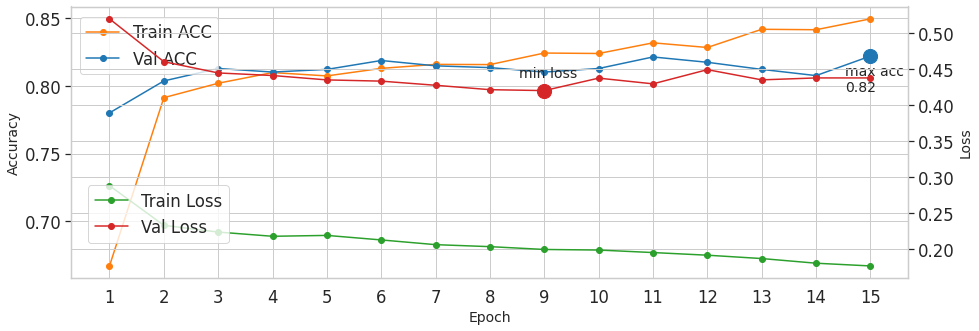

In [80]:
checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_acc', save_best_only=True)
history = lstm_model.fit(X_train_text, y_train, batch_size=batch_size, callbacks=[checkpoint], epochs=num_epochs, 
                         class_weight=class_weight, validation_data=(X_val_text, y_val), verbose=1)
plot_model_performance(history)

One thing to note is that when using class weights for class imbalance, the validation loss is consistently higher than the train loss, but this doesn't happen when class_weight is turned off.


In [81]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

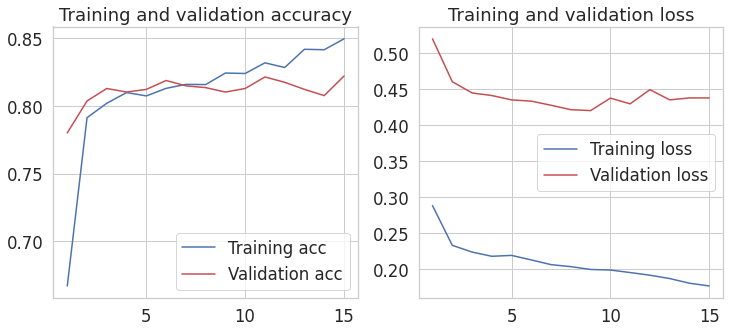

In [82]:
plot_history(history)

In [83]:
 from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
 from keras import optimizers

 model = Sequential()
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=maxlen, trainable=False)
model.add(embedding_layer)
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=dropout, recurrent_dropout=recurrent_dropout))) # try adding dropout later
model.add(Bidirectional(LSTM(128)))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 200)           2777400   
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 256)           336896    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 3,508,793
Trainable params: 731,393
Non-trainable params: 2,777,400
_________________________________________________________________
None


## 8.0 Model Error Analysis

To print and view the biggest miss-predictions of the LSTM Model.

Here we are trying to see if we can recognize some patterns or specific areas, where the model is failing that we will concentrate on improving moving forward. 

In [84]:
lstm_model.load_weights('lstm_model.h5')
val = X_val.copy()
val = val[['text']]
val['target'] = y_val
val['pred'] = lstm_model.predict_classes(X_val_text)
val['pred'] = val['pred'].apply(lambda x: 1 if x >=0.5 else 0)
error = val[val['target'] != val['pred']]
error.head()

,text,target,pred
2687,dorman 917033 ignition knock detonation sensor...,1,0
3266,he come to a land which be engulf in tribal wa...,0,1
4073,all hail shadow hybrid mix feat mike szuter yo...,1,0
4515,grace here be damage level usa style taiwan ch...,1,0
6615,omega men writer explore terrorism religion in...,0,1


<Figure size 432x288 with 0 Axes>

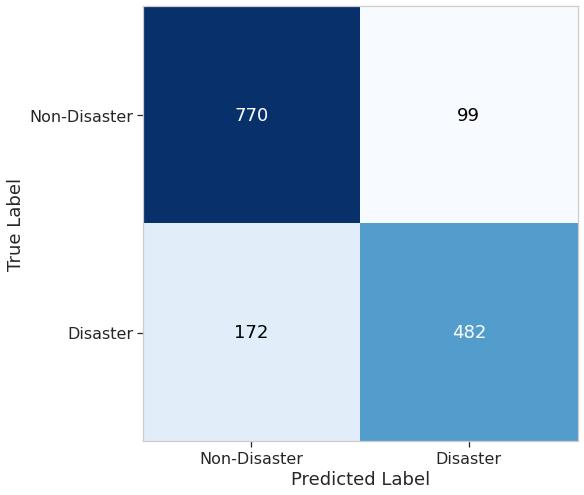

Num False Negatives: 172
Num False Positives: 99


In [85]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
cm  = confusion_matrix(val.target, val.pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Blues)
plt.xticks(range(2), ['Non-Disaster', 'Disaster'], fontsize=16)
plt.yticks(range(2), ['Non-Disaster', 'Disaster'], fontsize=16)
plt.xlabel('Predicted Label',fontsize=18)
plt.ylabel('True Label',fontsize=18)
plt.show()

print('Num False Negatives:',sum((val['target'] == 1) & (val['pred'] == 0)))
print('Num False Positives:',sum((val['target'] == 0) & (val['pred'] == 1)))

There appears to be more false negatives than false positives from the validation data, meaning that more tweets are being labelled as not disaster when in fact they are, even after using class_weights to adjust for the imbalance. 

Perhaps disaster tweets can be given even more weighting depending on the goal/purpose of the classification.

In [86]:
for t in error[(error['target'] == 1) & (error['pred'] == 0)]['text'].sample(n=20, random_state=0):
    print(t)

and i dont get wave of miss you anymore theyre more like tsunami tide in my eye
i agree with certain cultural appropriation things but honestly if u look at my house it scream appropriation bc buddhas and stuff
cowgirllawyer we must refuse to become a nation with everyone live in fear of be shoot unawares by intoxicate ampor crazy people
pyramidhead76 one good thing come out of watch the film be too traumatise to watch show so start halt and catch fire on amazon d
we be hire click to apply rn iiemergency servicesft7p7a nurse houston tx
robert gagnon review the catastrophe of impose samesex marriage and how christians should respond
tomorrow be go to be a year since i go to the panic concert dress as afycso ryan do u guy remember that
i add a video to a youtube playlist doc volcanoes and earthquakes inside the volcano
near them on the sand half sink a shatter visage lie
drink meals 101 what to cook when you be totally obliterate
kai forbath just demolish a weather station set up on a dr

## 9 Testing the LSTM Model

In [87]:
# count number of characters in each tweet
df_test['char_len'] = df_test.text.str.len()

# count number of words in each tweet
word_tokens = [len(word_tokenize(tweet)) for tweet in df_test.text]
df_test['word_len'] = word_tokens

# count number of sentence in each tweet
sent_tokens = [len(sent_tokenize(tweet)) for tweet in df_test.text]
df_test['sent_len'] = sent_tokens

In [88]:
# polarity and subjectivity
df_test['polarity'] = [TextBlob(tweet).sentiment.polarity for tweet in df_test.text]
df_test['subjectivity'] = [TextBlob(tweet).sentiment.subjectivity for tweet in df_test.text]

#############################################################################################################################
# exclaimation and question marks
df_test['exclaimation_num'] = [tweet.count('!') for tweet in df_test.text]
df_test['questionmark_num'] = [tweet.count('?') for tweet in df_test.text]

#############################################################################################################################
# count number of hashtags and mentions
# Function for counting number of hashtags and mentions
def count_url_hashtag_mention(text):
    urls_num = len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))
    word_tokens = text.split()
    hash_num = len([word for word in word_tokens if word[0] == '#' and word.count('#') == 1]) # only appears once in front of word 
    mention_num = len([word for word in word_tokens if word[0] == '@' and word.count('@') == 1]) # only appears once in front of word 
    return urls_num, hash_num, mention_num

url_num, hash_num, mention_num = zip(*[count_url_hashtag_mention(tweet) for tweet in df_test.text])
df_test = df_test.assign(url_num = url_num, hash_num = hash_num, mention_num = mention_num)

#############################################################################################################################
# count number of contractions
contractions = ["'t", "'re", "'s", "'d", "'ll", "'ve", "'m"]
df_test['contraction_num'] = [sum([tweet.count(cont) for cont in contractions]) for tweet in df_test.text]


In [89]:
## Replace NaNs with 'None'
df_test.keyword.fillna('None', inplace=True) 

#############################################################################################################################
## Expand Contractions

# Function for expanding most common contractions https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

df_test.text = [decontraction(tweet) for tweet in df_test.text]

#############################################################################################################################
## Remove Emojis

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

print(remove_emoji("OMG there is a volcano eruption!!! 😭😱😷"))

df_test.text = df_test.text.apply(lambda x: remove_emoji(x))


OMG there is a volcano eruption!!! 


In [90]:
#############################################################################################################################
## Remove URLs
df_test.text = df_test.text.apply(lambda x: remove_url(x))

#############################################################################################################################
## Remove Punctuations except '!?'

def remove_punct(text):
    new_punct = re.sub('\ |\!|\?', '', punctuation)
    table=str.maketrans('','',new_punct)
    return text.translate(table)

df_test.text = df_test.text.apply(lambda x: remove_punct(x))

#############################################################################################################################
## Replace amp
def replace_amp(text):
    text = re.sub(r" amp ", " and ", text)
    return text

df_test.text = df_test.text.apply(lambda x: replace_amp(x))

#############################################################################################################################


In [91]:
## Lemmatization

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemma(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(w.lower(), pos='v') for w in words])

df_test.text = df_test.text.apply(lambda x: lemma(x))


In [92]:
# tokenize
test_text = df_test['text']
test_text = tokenizer_1.texts_to_sequences(test_text)

# padding
test_text = pad_sequences(test_text, padding='post', maxlen=50)

print('X_test shape:', test_text.shape)


X_test shape: (3263, 50)


In [93]:
# lstm prediction

model.predict(test_text)
lstm_model.load_weights('lstm_model.h5')
lstm_model.predict_classes(test_text)



array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

##Bidirectional LSTM with Attention

**Bi-Derectional LSTM**. 

As the name suggest this Layer "reads" text both forwards and backwards and allows the model to get information from past and future states simultaneously.

The Bidirectional LSTM takes into account information from both past and future to create the output at the current timepoint, as shown by the figure above in the LSTM layer. Note that a gated recurrent unit (GRU) can also be used instead of a LSTM.

The idea of attention aims to search for "a set of positions in a source sentence where the most relevant information is concentrated. The model then predicts a target word based on the context vectors associated with these source positions and all the previous generated target words."

**2. Bidirectional LSTM with Attention***

In [94]:
## Attention Class

from keras.layers import Layer
import keras.backend as K

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [95]:
### Attention

## Hyperparameters
num_epochs=15
dropout=0.3
recurrent_dropout=0.3
lr=0.0005
batch_size=128

import tensorflow as tf
from keras.models import Sequential
from keras import Model
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Input, Layer, GlobalMaxPooling1D, LSTM, Bidirectional, Concatenate
from keras.layers.embeddings import Embedding
from keras import optimizers

## Embedding Layer
sequence_input = Input(shape=(maxlen,))
embedded_sequences = Embedding(vocab_size, 200, weights=[embedding_matrix], trainable=False)(sequence_input)

## RNN Layer
lstm = Bidirectional(LSTM(128, return_sequences = True, dropout=dropout, recurrent_dropout=recurrent_dropout))(embedded_sequences)
# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(128, return_sequences=True, return_state=True))(lstm)

## Attention Layer
att_out=attention()(lstm)
outputs=Dense(1,activation='sigmoid')(att_out)
model_attn = Model(sequence_input, outputs)

adam = optimizers.Adam(lr=lr)
#sgd = optimizers.sgd(lr=lr)
model_attn.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

print(model_attn.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 50, 200)           2777400   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 256)           336896    
_________________________________________________________________
bidirectional_3 (Bidirection [(None, 50, 256), (None,  394240    
_________________________________________________________________
attention (attention)        (None, 256)               306       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 3,509,099
Trainable params: 731,699
Non-trainable params: 2,777,400
_____________________________________________

Epoch 1/15
48/48 [==============================] - 24s 362ms/step - loss: 0.3076 - acc: 0.6506 - val_loss: 0.4544 - val_acc: 0.8076
Epoch 2/15
48/48 [==============================] - 16s 343ms/step - loss: 0.2266 - acc: 0.7911 - val_loss: 0.4583 - val_acc: 0.8050
Epoch 3/15
48/48 [==============================] - 16s 339ms/step - loss: 0.2248 - acc: 0.7908 - val_loss: 0.4318 - val_acc: 0.8129
Epoch 4/15
48/48 [==============================] - 16s 343ms/step - loss: 0.2111 - acc: 0.8037 - val_loss: 0.4244 - val_acc: 0.8142
Epoch 5/15
48/48 [==============================] - 16s 337ms/step - loss: 0.2098 - acc: 0.8114 - val_loss: 0.4373 - val_acc: 0.8194
Epoch 6/15
48/48 [==============================] - 16s 340ms/step - loss: 0.2061 - acc: 0.8116 - val_loss: 0.4259 - val_acc: 0.8155
Epoch 7/15
48/48 [==============================] - 16s 343ms/step - loss: 0.2045 - acc: 0.8212 - val_loss: 0.4408 - val_acc: 0.8162
Epoch 8/15
48/48 [==============================] - 17s 347ms/step - 

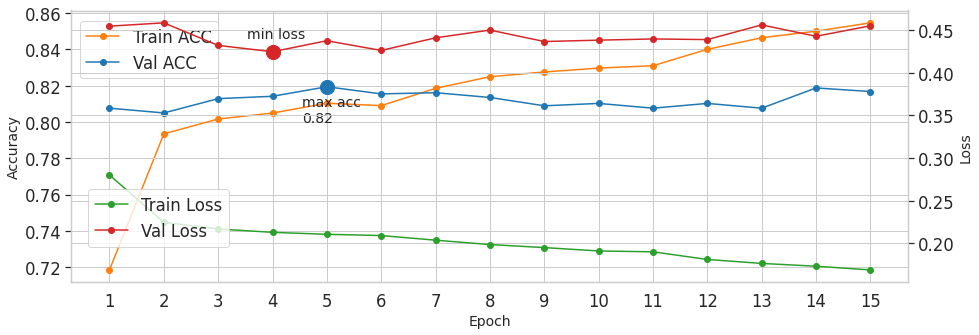

In [96]:
checkpoint = ModelCheckpoint('attn_model.h5', monitor='val_acc', save_best_only=True)
history_attn = model_attn.fit(X_train_text, y_train, batch_size=batch_size, callbacks=[checkpoint], epochs=num_epochs, 
                              class_weight=class_weight, validation_data=(X_val_text, y_val), verbose=1)
plot_model_performance(history_attn)

Again, the validation loss is consistently higher than the train loss when using class weights.

In [ ]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

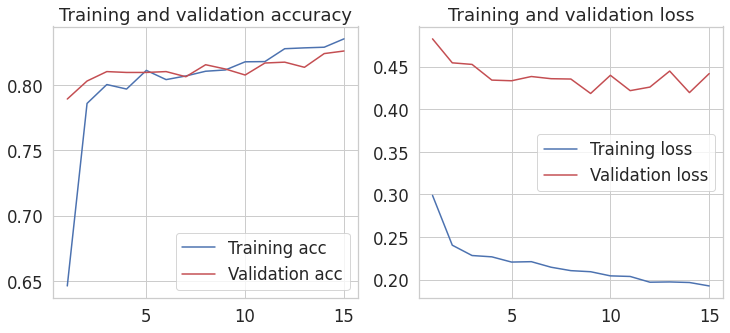

In [ ]:
plot_history(history)

##BERT (The Bidirectional Encoder Representations from Transformers

This is a language model developed by Google which has achieved state-of-the-art results in a variety of NLP tasks. 

BERT's key innovation is applying bidirectional training (actually it is non-directional, as it reads the entire sequence of words at once) of the encoder part of a **Transformer.**

The BERT model uses a multi-layer bidirectional Transformer encoder (stacks the encoder several times). Only the encoder is needed as its goal is to create a language model. It performs self-attention in both directions and is pre-trained using two unsupervised prediction tasks.

In [97]:
maxlen = 160
lr = 1e-5 # 1e-5 
num_epochs = 3 # 5
batch_size=16 # batch size cannot be too big for bert


In [98]:
!pip3 install tensorflow_text>=2.0.0rc0

In [100]:
!pip install sentencepiece

In [101]:
# We will use the official tokenization script created by the Google team
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tokenization


def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [102]:
def build_model(bert_layer, max_len=512, lr=1e-5):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(clf_output)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [103]:
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

CPU times: user 21.8 s, sys: 3.95 s, total: 25.7 s
Wall time: 27.6 s


In [104]:
train_input = bert_encode(X_train.text.values, tokenizer, max_len=maxlen)
val_input = bert_encode(X_val.text.values, tokenizer, max_len=maxlen)
train_labels = y_train.target.values
val_labels = y_val.target.values

In [105]:
bert_model = build_model(bert_layer, max_len=maxlen, lr=lr)
bert_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [106]:

checkpoint = ModelCheckpoint('bertmodel.h5', monitor='val_accuracy', save_best_only=True)

bert_history = bert_model.fit(
    train_input, train_labels,
    validation_data=(val_input, val_labels),
    epochs=num_epochs,
    callbacks=[checkpoint], 
    #class_weight=class_weight,
    batch_size=batch_size
)

Epoch 1/3
381/381 [==============================] - 684s 2s/step - loss: 0.4849 - accuracy: 0.7731 - val_loss: 0.4092 - val_accuracy: 0.8319
Epoch 2/3
381/381 [==============================] - 656s 2s/step - loss: 0.2531 - accuracy: 0.9047 - val_loss: 0.4400 - val_accuracy: 0.8247
Epoch 3/3
381/381 [==============================] - 656s 2s/step - loss: 0.1265 - accuracy: 0.9556 - val_loss: 0.5156 - val_accuracy: 0.8319


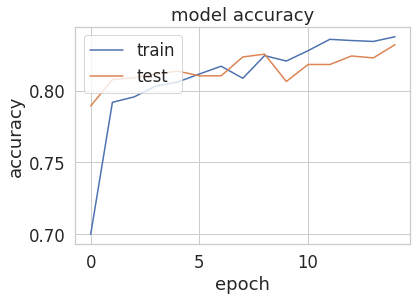

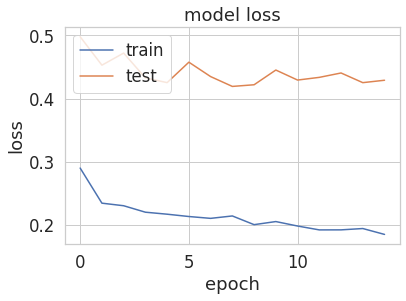

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

The output shows that the difference between the accuracy values for training and test sets is much smaller compared to the LSTM and LSTM with Attention Model experimented above

## Model Error Analysis of BERT

In [107]:
bert_model.load_weights('bertmodel.h5')
val = X_val.copy()
val = val[['text']]
val['target'] = y_val
val['pred'] = bert_model.predict(val_input)
val['pred'] = val['pred'].apply(lambda x: 1 if x >=0.5 else 0)
error = val[val['target'] != val['pred']]
error.head()

,text,target,pred
2687,dorman 917033 ignition knock detonation sensor...,1,0
4073,all hail shadow hybrid mix feat mike szuter yo...,1,0
1795,crash and burn,1,0
1432,cos sanity bring no reward for one more hit an...,1,0
6968,dr jim and the tsunami the latest new yorker w...,0,1


<Figure size 432x288 with 0 Axes>

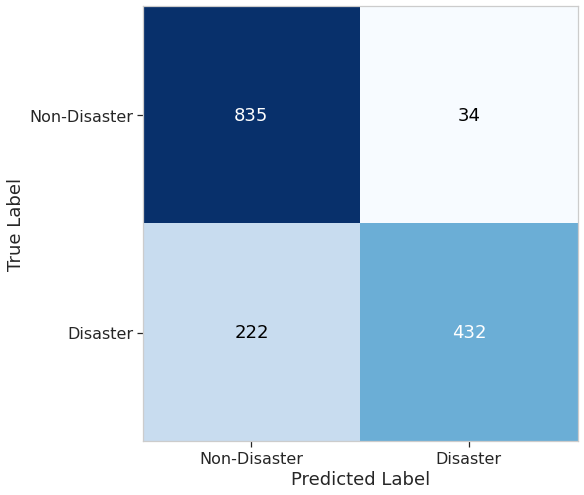

Num False Negatives: 222
Num False Positives: 34


In [108]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
cm  = confusion_matrix(val.target, val.pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Blues)
plt.xticks(range(2), ['Non-Disaster', 'Disaster'], fontsize=16)
plt.yticks(range(2), ['Non-Disaster', 'Disaster'], fontsize=16)
plt.xlabel('Predicted Label',fontsize=18)
plt.ylabel('True Label',fontsize=18)
plt.show()

print('Num False Negatives:',sum((val['target'] == 1) & (val['pred'] == 0)))
print('Num False Positives:',sum((val['target'] == 0) & (val['pred'] == 1)))

There appears to be more false negatives than false positives from the validation data, meaning that more tweets are being labelled as not disaster when in fact they are, even after using class_weights to adjust for the imbalance. Perhaps disaster tweets can be given even more weighting depending on the goal/purpose of the classification.

In [109]:
for t in error[(error['target'] == 1) & (error['pred'] == 0)]['text'].sample(n=20, random_state=0):
    print(t)

robert gagnon review the catastrophe of impose samesex marriage and how christians should respond
oh yeah my ipod almost explode last night i be use it while charge and shit be spark akxbskdn almost die
i learn more about economics from one south dakota dust storm than i do in all my years in college hubert humphrey
warfighting robots could reduce civilian casualties so call for a ban now be premature ieee spectrum
nigeltanner1 believe it or not we have have too much rain here our newly plant maple tree be actually drown
nothing to fear it be all about take risk
could billboard be hot 100 chart be displace by these socialmediadriven music chart
imagine a school where suicide bomb be be teach the teachers would say to the studentsplease pay
nro except when order not to carry unauthorized weapons while on duty or in military uniform thats the rule fool
twia board approve 5 percent rate hike the texas windstorm insurance association twia board of directors v
government experts concern abo

In [120]:
# bert prediction

test_input = bert_encode(df_test.text.values, tokenizer, max_len=160)

bert_model.load_weights('bertmodel.h5')

## Conclusion

We experimented 3 different types of deep learning models for Neural Text Classification using data scrapped from twitter.

We changed the number of layers, number of neurons, and activation functions, for all the deep learning models to see which neural network works best for our problem.


The results showed that the Bidirectional Encoder Representations from Transformers (BERT) language model outperforms the baseline Random Forest model, Vanilla LSTM, and the Bidirectional LSTM with Attention Model.
In parallel separate model experiments with a Gated Recurrent Unity (GRU model instead of a Vanilla LSTM, the output was of slightly equal performance to the LSTM Language model.


In the output, we achieved a desired validation accuracy of 83.27% with BERT. We can see that there is a very small difference between the training accuracy and the validation accuracy.

 The difference between the loss values is negligible, which shows that our selected model is not overfitting.
We can therefore conclude, that for our problem, Bidirectional Encoder Representations from Transformers (BERT) l is the best algorithm.




**Transformers is all you need for Disaster Tweets Classification**